# Prueba de evaluación 1 - Parte 1
- Entornos de data science con Python
- Curso 2015/16.
***
- Autor: Juan Antonio García Cuevas
- Fecha: 14/07/2016
***

# Parte 1
En esta primera parte trabajaremos con datos de cotización de Bitcoin. En esta página:
http://www.coindesk.com/price/
Se pueden descargar los valores de “cierre” de esa cotización en dólares en diferentes mercados “exchanges” mediante el botón “Export” del gráfico, como CSV.

### 1.1. Lectura de datos
- Obtén de coindex los datos de al menos tres exchanges como ficheros CSV separados para al menos un período de un año.
- Carga los datos como un DataFrame fusionando los ficheros en uno solo.
- Utiliza como índice la fecha de cotización.

Primero descargamos varios ficheros desse la url:

[http://api.bitcoincharts.com/v1/csv/](http://api.bitcoincharts.com/v1/csv/)


In [1]:
# Librerías
import pandas as pd 
import numpy as np
import datetime as dtm
import calendar as cal
import matplotlib.pyplot as plt
# GUI interna
%matplotlib inline 

In [2]:
# Lista de ficheros CSV
csv_list = [['coinbaseUSD.csv', 'coinbase'], ['bitfinexUSD.csv', 'bitfinex'], ['btceUSD.csv', 'btce']]

In [3]:
# Función para convertir timestamp en date
f_timestamp_2_date = lambda x: dtm.datetime.utcfromtimestamp(x).strftime('%Y/%m/%d')

In [4]:
# Función para convertir date en timestamp
f_date_2_timestamp = lambda x: cal.timegm(dtm.datetime.strptime(x, "%d/%m/%Y").utctimetuple())

In [5]:
# Rango de fechas en formato UNIXTIME para filtrar los datos de los CSV por el año 2015
date_ini = '01/01/2015'
date_fin = '01/01/2016'

ut_ini = f_date_2_timestamp(date_ini)
ut_fin = f_date_2_timestamp(date_fin)

print 'Fecha inicial:', date_ini, '->', ut_ini
print 'Fecha final..:', date_fin, '->', ut_fin

Fecha inicial: 01/01/2015 -> 1420070400
Fecha final..: 01/01/2016 -> 1451606400


In [6]:
# Función que carga un fichero CSV y lo trata
def cargar_datos_fichero(file, exchange):

    # Carga el fichero CSV
    data_csv = pd.read_csv('data/' + file, header=0, names=['date','price','amount'])

    # Selecciona los datos del rango de fechas (año 2015)
    data_csv = data_csv[(data_csv['date'] >= ut_ini) & (data_csv['date'] < ut_fin)]

    # Convierte la fecha a formato date
    data_csv['date'] = data_csv['date'].apply(f_timestamp_2_date)
    
    # Ordena los datos por fecha
    data_csv = data_csv.sort_values(by='date')

    # selecciona el último dato de cada día
    data_csv['date2'] = data_csv['date']
    data_csv = data_csv.groupby('date2').last()

    # Rellena los huecos (NaN) con el valor anterior
    data_csv = data_csv.fillna(method='pad')
    # Rellena los huecos (NaN) interpolando
    #data_csv = data_csv.interpolate(method='linear')

    # Añade una columna con el exchange
    data_csv['exchange'] = exchange
    
    # Muestra información
    numrows_data, numcols_data = data_csv.shape
    print '\n--- Fichero: ', file
    print 'Número de filas CSV...:', numrows_data
    print 'Número de columnas CSV:', numcols_data
    print data_csv.head()

    # Muestra la gráfica
    title = 'Cotizacion: ' + exchange
    grp = data_csv[["price"]].plot(kind="line", title=title, figsize=(15,5), legend=False, fontsize=12)
    grp.set_xlabel("Fecha", fontsize=12)
    grp.set_ylabel("Precio", fontsize=12)
    plt.show()

    return data_csv


--- Fichero:  coinbaseUSD.csv
Número de filas CSV...: 353
Número de columnas CSV: 4
                  date   price  amount  exchange
date2                                           
2015/01/08  2015/01/08  284.86    0.01  coinbase
2015/01/13  2015/01/13  260.00    1.00  coinbase
2015/01/14  2015/01/14  144.70    0.01  coinbase
2015/01/15  2015/01/15  205.82    0.01  coinbase
2015/01/16  2015/01/16  210.31    0.01  coinbase


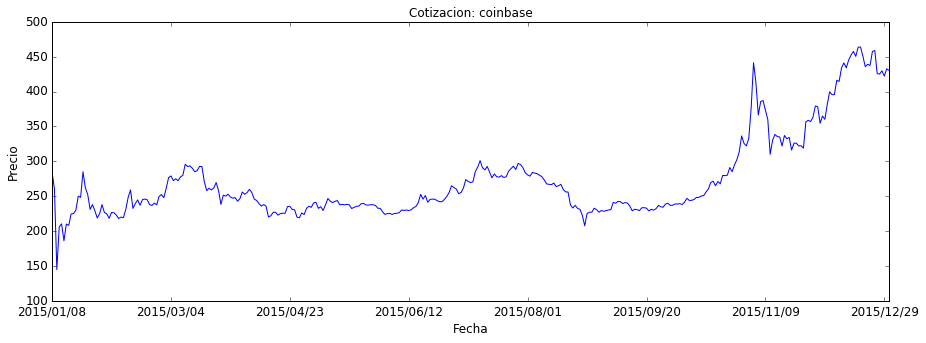

In [7]:
# Carga el primer fichero CSV
csv1 = cargar_datos_fichero(csv_list[0][0], csv_list[0][1])


--- Fichero:  bitfinexUSD.csv
Número de filas CSV...: 365
Número de columnas CSV: 4
                  date   price    amount  exchange
date2                                             
2015/01/01  2015/01/01  316.97  0.100000  bitfinex
2015/01/02  2015/01/02  314.90  0.137225  bitfinex
2015/01/03  2015/01/03  297.27  3.654126  bitfinex
2015/01/04  2015/01/04  281.60  3.000000  bitfinex
2015/01/05  2015/01/05  271.94  0.581832  bitfinex


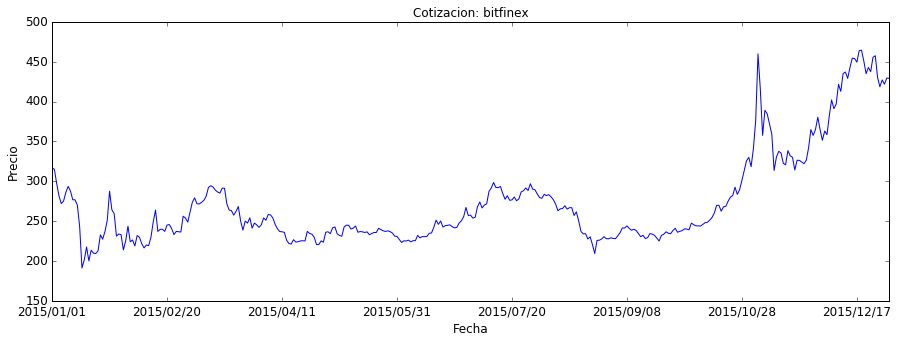

In [8]:
# Carga el segundo fichero CSV
csv2 = cargar_datos_fichero(csv_list[1][0], csv_list[1][1])


--- Fichero:  btceUSD.csv
Número de filas CSV...: 357
Número de columnas CSV: 4
                  date    price    amount exchange
date2                                             
2015/01/01  2015/01/01  313.989  0.038000     btce
2015/01/02  2015/01/02  312.532  0.027810     btce
2015/01/03  2015/01/03  298.000  0.010000     btce
2015/01/04  2015/01/04  283.495  0.030375     btce
2015/01/05  2015/01/05  269.310  0.080000     btce


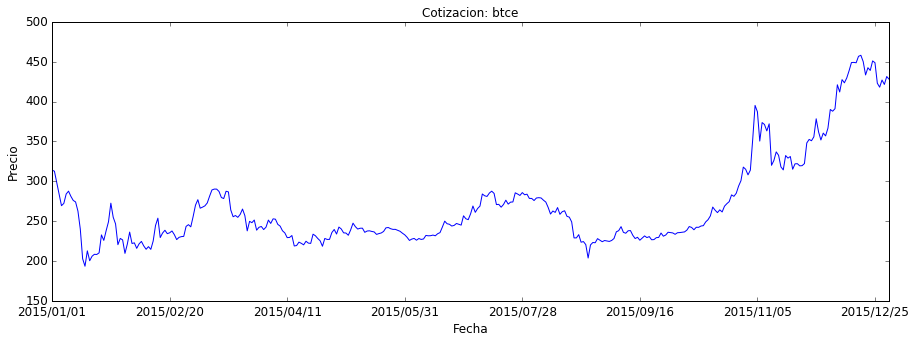

In [9]:
# Carga el tercer fichero CSV
csv3 = cargar_datos_fichero(csv_list[2][0], csv_list[2][1])

Número de filas CSV...: 365
Número de columnas CSV: 10
Tiene valores nulos...: False
         date  price_x  amount_x exchange_x  price_y  amount_y exchange_y  \
0  2015/01/08   284.86      0.01   coinbase   293.56     0.400   bitfinex   
1  2015/01/13   260.00      1.00   coinbase   242.60     5.120   bitfinex   
2  2015/01/14   144.70      0.01   coinbase   191.18     0.030   bitfinex   
3  2015/01/15   205.82      0.01   coinbase   201.33     0.013   bitfinex   
4  2015/01/16   210.31      0.01   coinbase   217.49     2.000   bitfinex   

     price    amount exchange  
0  287.551  0.017348     btce  
1  240.021  0.350000     btce  
2  202.774  0.010471     btce  
3  193.383  0.013490     btce  
4  212.651  0.028942     btce  


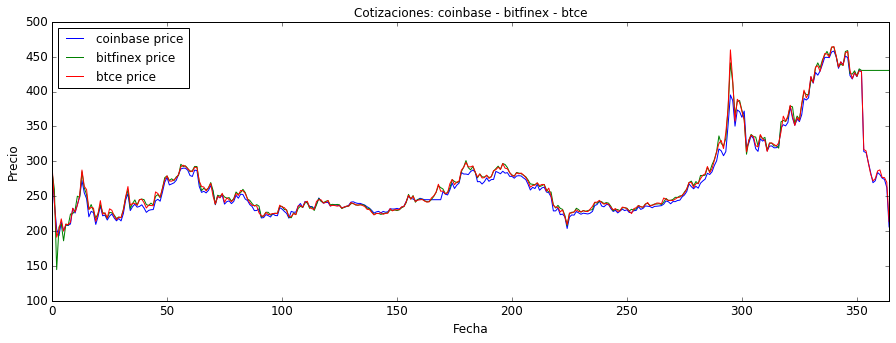

In [10]:
# Construye el dataframe principal
data = csv1
data = data.merge(csv2, left_on='date', right_on='date', how='outer')
data = data.merge(csv3, left_on='date', right_on='date', how='outer')
data.sort_index()

# Rellena los huecos (NaN) con el valor anterior
data = data.fillna(method='pad')
# Rellena los huecos (NaN) interpolando
#data = data.interpolate(method='linear')

# Muestra información
numrows_data, numcols_data = data.shape
print 'Número de filas CSV...:', numrows_data
print 'Número de columnas CSV:', numcols_data
print 'Tiene valores nulos...:', data.isnull().values.any()
print data.head()

# Muestra la gráfica
title = "Cotizaciones: " + csv_list[0][1] + " - " + csv_list[1][1] + " - " + csv_list[2][1]
grp = data[["price", "price_x", "price_y"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha",fontsize=12)
grp.set_ylabel("Precio",fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[1][1] + ' price', csv_list[2][1] + ' price'), loc='upper left')
plt.show()

### 1.3. Procesamiento
- Obtén los día de máximo y mínimo valor de cotización y un gráfico con la media móvil
(“rolling mean”) simple (https://en.wikipedia.org/wiki/Moving_average) de los valores de una de las series (puedes probar con varios valores de n). Nota: La media móvil puede encontrarse implementada en alguna biblioteca, no hace falta calcularla programando.
- Obtén el máximo “spread” (diferencia para el mismo día en los diferentes exchanges) del precio de bitcoin, y el “spread medio” para todo el periodo.
- Crea gráficos que los comparen dos a dos, y que muestren con alguna indicación gráfica (por ejemplo, un punto de otro color) los días de mayor “spread”. Pista: puedes obtener un subconjunto del dataframe solo con estos días y dibujarlo como si fuese otra serie diferente.

In [11]:
# Obtiene las fechas de menor y mayor cotización de cada exchange
min1 = data['price'].idxmin()
max1 = data['price'].idxmax()
min2 = data['price_x'].idxmin()
max2 = data['price_x'].idxmax()
min3 = data['price_y'].idxmin()
max3 = data['price_y'].idxmax()
print 'Fecha de menor cotización para', csv_list[0][1], ":", min1
print 'Fecha de mayor cotización para', csv_list[0][1], ":", max1
print 'Fecha de menor cotización para', csv_list[1][1], ":", min2
print 'Fecha de mayor cotización para', csv_list[1][1], ":", max2
print 'Fecha de menor cotización para', csv_list[2][1], ":", min3
print 'Fecha de mayor cotización para', csv_list[2][1], ":", max3

print 'Día de máximo valor: ' + str(data['price'].idxmax())
print 'Día de mínimo valor: ' + str(data['price'].idxmin())

Fecha de menor cotización para coinbase : 3
Fecha de mayor cotización para coinbase : 340
Fecha de menor cotización para bitfinex : 2
Fecha de mayor cotización para bitfinex : 340
Fecha de menor cotización para btce : 2
Fecha de mayor cotización para btce : 340
Día de máximo valor: 340
Día de mínimo valor: 3


In [12]:
data_rm = data.rolling(window=30).mean()
data_rm = data_rm.dropna()
data_rm.head(10)

,date,price_x,amount_x,exchange_x,price_y,amount_y,exchange_y,price,amount,exchange
29,2015/02/11,228.313333,0.242925,coinbase,230.203333,1.515031,bitfinex,226.071567,0.239459,btce
30,2015/02/12,226.125000,0.309130,coinbase,227.724000,1.546107,bitfinex,223.638333,0.239880,btce
31,2015/02/13,225.159000,0.277463,coinbase,227.294000,1.375773,bitfinex,223.137633,0.261547,btce
32,2015/02/14,228.615000,0.277463,coinbase,229.224667,1.520043,bitfinex,224.528500,0.270531,btce
33,2015/02/15,230.388333,0.440890,coinbase,231.307333,1.597572,bitfinex,226.537267,0.270415,btce
34,2015/02/16,231.124667,0.444823,coinbase,231.957667,1.864238,bitfinex,227.092567,0.286117,btce
35,2015/02/17,232.905667,0.445297,coinbase,233.278667,1.885373,bitfinex,228.251100,0.283450,btce
36,2015/02/18,234.060667,0.442297,coinbase,234.277000,2.072197,bitfinex,229.257400,1.128843,btce
37,2015/02/19,235.027333,0.447126,coinbase,235.203667,1.918863,bitfinex,230.127633,1.128260,btce
38,2015/02/20,235.712000,0.635860,coinbase,236.282667,1.864073,bitfinex,230.966000,1.128618,btce


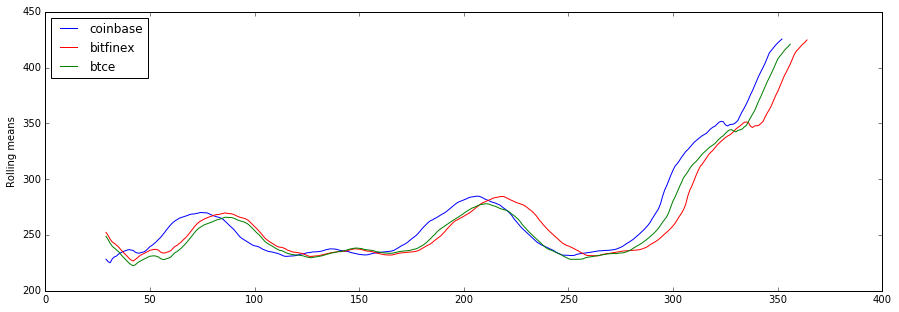

In [13]:
# Calcula la media móvil (rolling mean) de cada exchange
csv1_rm = csv1.reset_index()['price'].rolling(window=30).mean()
csv2_rm = csv2.reset_index()['price'].rolling(window=30).mean()
csv3_rm = csv3.reset_index()['price'].rolling(window=30).mean()

# Elimina los datos NaN
csv1_rm.dropna(inplace=True)
csv2_rm.dropna(inplace=True)
csv3_rm.dropna(inplace=True)

# Muestra la gráfica
plt.figure(figsize=(15,5), dpi=80)
plt.plot(csv1_rm, color="blue", label=csv_list[0][1])
plt.plot(csv2_rm, color="red", label=csv_list[1][1])
plt.plot(csv3_rm, color="green", label=csv_list[2][1])
plt.legend(loc='upper left')
plt.ylabel('Rolling means')
plt.show()

In [14]:
# Agrupa los precios por fecha
data_uni = pd.concat([csv1[['date', 'price']], csv2[['date', 'price']], csv3[['date', 'price']]])
data_uni = data_uni.groupby('date')

# Calcula los spread para cada fecha
max_spread = data_uni['price'].max()
min_spread = data_uni['price'].min()
spreads = max_spread - min_spread
print 'Fecha de spread máximo:', spreads.idxmax(), '. Spread máximo:', spreads.max()
print 'Fecha de spread mínimo:', spreads.idxmin(), '. Spread mínimo:', spreads.min()

# Calcula el spread medio del periodo
med_spread = spreads.mean()
print 'Spread medio del periodo:', med_spread

Fecha de spread máximo: 2015/11/04 . Spread máximo: 64.67
Fecha de spread mínimo: 2015/06/26 . Spread mínimo: 0.08
Spread medio del periodo: 5.73004931507


In [15]:
# Calcula los spreads por pares de precios
data['sp12'] = abs(data['price'] - data['price_x'])
data['sp13'] = abs(data['price'] - data['price_y'])
data['sp23'] = abs(data['price_x'] - data['price_y'])

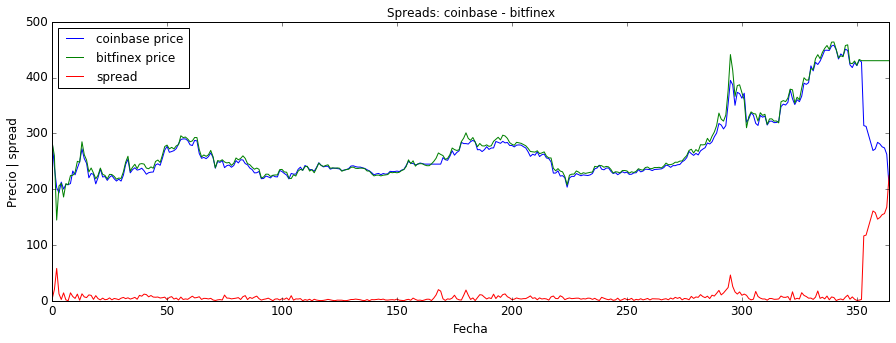

In [16]:
# Gráfica comparativa de precios csv1 y csv2
title = "Spreads: " + csv_list[0][1] + " - " + csv_list[1][1]
grp = data[["price", "price_x", "sp12"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha", fontsize=12)
grp.set_ylabel("Precio | spread",fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[1][1] + ' price', 'spread'), loc='upper left')
plt.show()

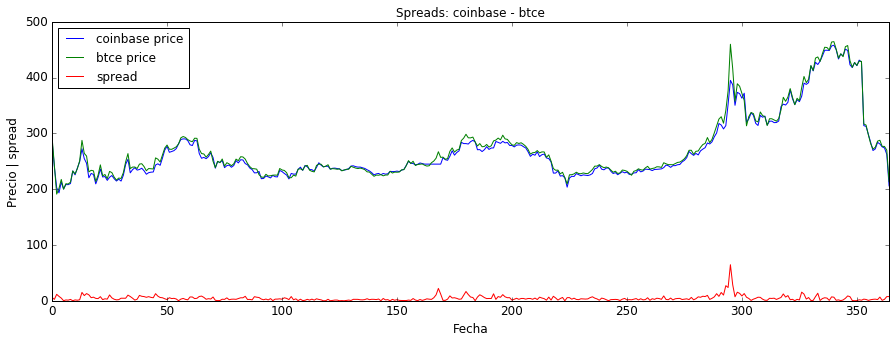

In [17]:
# Gráfica comparativa de precios csv1 y csv3
title = "Spreads: " + csv_list[0][1] + " - " + csv_list[2][1]
grp = data[["price", "price_y", "sp13"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha", fontsize=12)
grp.set_ylabel("Precio | spread",fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[2][1] + ' price', 'spread'), loc='upper left')
plt.show()

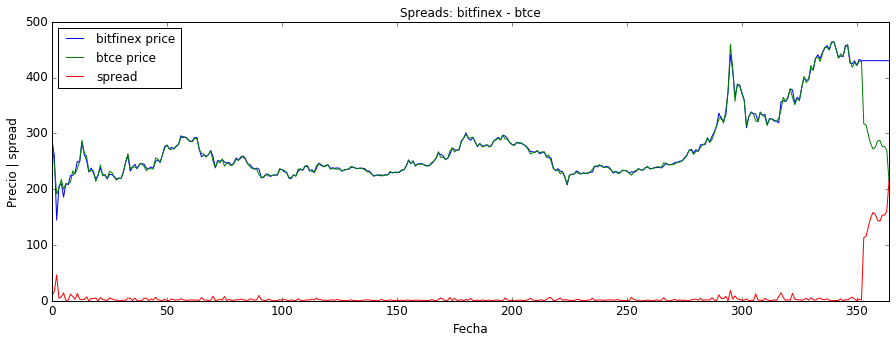

In [18]:
# Gráfica comparativa de precios csv2 y csv3
title = "Spreads: " + csv_list[1][1] + " - " + csv_list[2][1]
grp = data[["price_x", "price_y", "sp23"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha", fontsize=12)
grp.set_ylabel("Precio | spread", fontsize=12)
plt.legend((csv_list[1][1] + ' price', csv_list[2][1] + ' price', 'spread'), loc='upper left')
plt.show()